# EARLY-STOPPING  :




In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

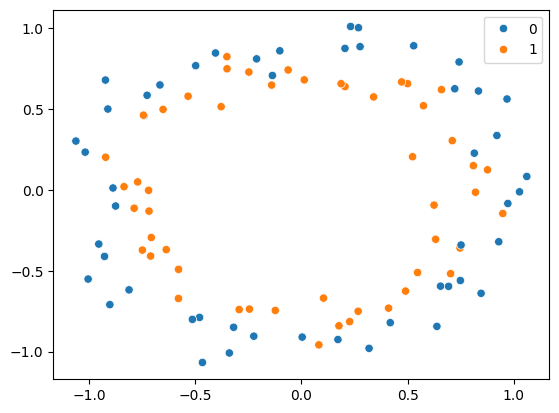

In [6]:
sns.scatterplot(x= X[:,0],y=X[:,1],hue=y)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
callback = EarlyStopping(
    monitor ='val_loss',
    min_delta= 0.00001,
    patience = 20,
    verbose =1,
    mode='auto',
    baseline = None,
    restore_best_weights=False
)

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 3500,callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5110 - loss: 0.6851 - val_accuracy: 0.4333 - val_loss: 0.6972
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5189 - loss: 0.6826 - val_accuracy: 0.4333 - val_loss: 0.6973
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5065 - loss: 0.6835 - val_accuracy: 0.4333 - val_loss: 0.6976
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5787 - loss: 0.6802 - val_accuracy: 0.4000 - val_loss: 0.6979
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5670 - loss: 0.6841 - val_accuracy: 0.4000 - val_loss: 0.6983
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5826 - loss: 0.6819 - val_accuracy: 0.4000 - val_loss: 0.6987
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5670 - loss: 0.6805 - val_accuracy: 0.4000 - val_loss: 0.6994
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5787 - loss: 0.6813 - val_accuracy: 0.4000 

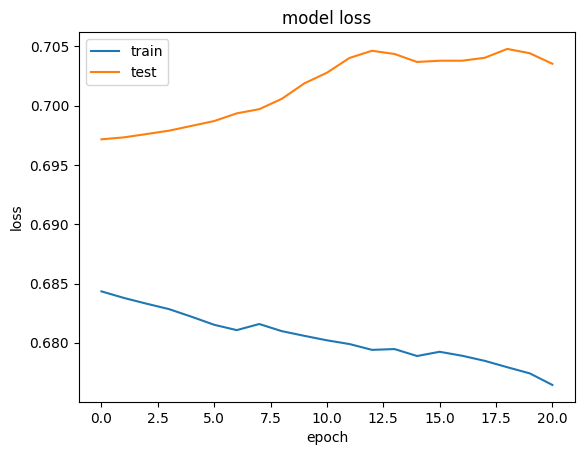

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


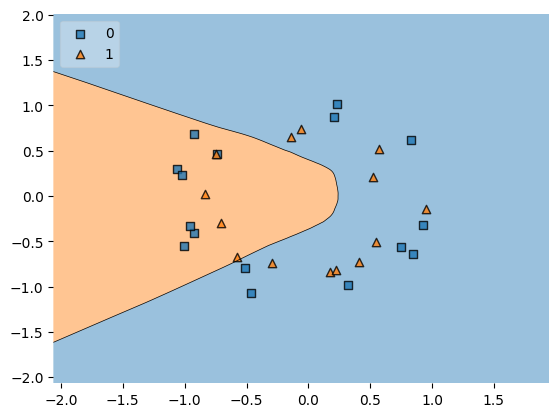

In [17]:
plot_decision_regions(X_test,y_test.ravel(),clf = model,legend =2)
plt.show()